In [1]:
#imoporting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('../Data/credit_risk_dataset.csv',skipinitialspace=False)

In [3]:
dataset.shape

(32581, 12)

In [4]:
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#### Printing missing values 

In [7]:
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]
print(len(features_with_na))

2


In [8]:
for feature in features_with_na:
    missing_values = dataset[feature].isnull().sum()/dataset.shape[0]
    print(f'The feature {feature} has {np.round(missing_values*100, 4)}% missing values')

The feature person_emp_length has 2.747% missing values
The feature loan_int_rate has 9.5639% missing values


The missing values are not that great so the missing values can be imputed later in the feature engineering phase.

In [9]:
# displaying unique values in the dataset
print('{:>30}{:>15}'.format('Feature','Unique Values'))
for feature in dataset.columns:
    print(f'{feature:>30}{len(dataset[feature].unique()):>10}')

                       Feature  Unique Values
                    person_age        58
                 person_income      4295
         person_home_ownership         4
             person_emp_length        37
                   loan_intent         6
                    loan_grade         7
                     loan_amnt       753
                 loan_int_rate       349
                   loan_status         2
           loan_percent_income        77
     cb_person_default_on_file         2
    cb_person_cred_hist_length        29


In [10]:
labels = np.array(dataset.loan_status.value_counts())

<Axes: >

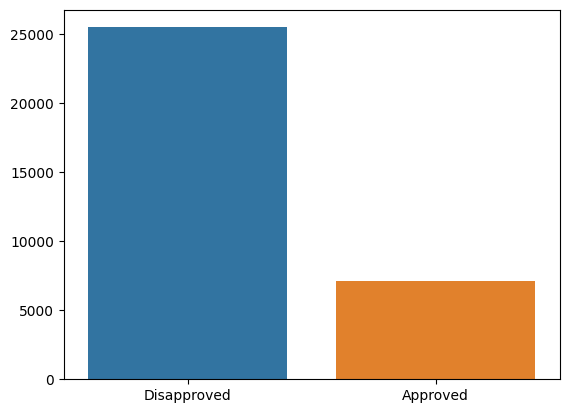

In [11]:
sns.barplot(y=labels, x=['Disapproved','Approved'])

As it is evident that the dataset is imbalanced. 


In [12]:
# information about target variable
dataset.loan_status.describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [13]:
dataset[dataset.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


#### Extracting categorical and nmerical features into different variables

In [14]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

In [15]:
dataset[categorical_features]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [16]:
numerical_features = [feature for feature in dataset.columns if feature not in categorical_features]

In [17]:
dataset[numerical_features]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


#### Statistical analysis

General statistical analysis

In [18]:
dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Classwise statistical analysis

In [20]:
# For positive or 1 class
loan_status_yes = dataset[dataset["loan_status"]==1]
loan_status_yes.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,7108.000000,7108.000000,6826.000000,7108.000000,6464.000000,7108.0,7108.000000,7108.000000
mean,27.474676,49125.652223,4.137562,10850.502954,13.060207,1.0,0.246889,5.685003
std,6.263642,36907.376527,4.126956,7143.345344,3.293167,0.0,0.132148,4.103208
min,20.000000,4000.000000,0.000000,900.000000,5.420000,1.0,0.010000,2.000000
25%,23.000000,30000.000000,1.000000,5000.000000,10.740000,1.0,0.140000,3.000000
50%,26.000000,41498.000000,3.000000,9600.000000,13.490000,1.0,0.240000,4.000000
75%,30.000000,59497.750000,6.000000,15000.000000,15.580000,1.0,0.340000,8.000000
max,70.000000,703800.000000,123.000000,35000.000000,23.220000,1.0,0.780000,30.000000
